### **Multiple Plots in a Figure, using `Matplotlib`**  
* Simple example : time vs wind speed

#### **1.Load important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import display, HTML
%matplotlib inline

#### **2.Set variables**

In [2]:
vCutIn = 3.5
vRated = 12
noutfile = 'output'
ninfile = 'measData_Hyosung_0118-0218.xls'

vMax = int(vRated + 4)
vMin = int(np.floor(vCutIn))
noutlog = noutfile + '.txt'
outlog = open(noutlog, 'w')

#### **3.1. Glancing on data**

In [3]:
data = pd.read_excel(ninfile)
data = data.iloc[:, :8]
#data.head().style
display(data.head())

,month,day,hour,minute,windDirValidation,powerValidation,meanWindSpeed,meanWindSpeedTenMinutes
0,1,18,0,0,1,0,10.355214,9.092462
1,1,18,0,1,1,0,9.321984,9.098566
2,1,18,0,2,1,0,9.699292,9.210747
3,1,18,0,3,1,0,8.507020,9.232127
4,1,18,0,4,1,0,9.689152,9.329701


#### **3.2. Shortening Column names, for ease**

In [4]:
data.rename(columns={
                     'windDirValidation':'dir', 
                     'powerValidation':'pow', 
                     'meanWindSpeed':'mean1',
                     'meanWindSpeedTenMinutes':'mean10'
                      }, inplace=True)
data.head().style

,month,day,hour,minute,dir,pow,mean1,mean10
0,1,18,0,0,1,0,10.3552,9.09246
1,1,18,0,1,1,0,9.32198,9.09857
2,1,18,0,2,1,0,9.69929,9.21075
3,1,18,0,3,1,0,8.50702,9.23213
4,1,18,0,4,1,0,9.68915,9.3297


#### **3.3. Adding a 'standard' Timestamp : 'indexMinutes'**

In [5]:
data['indexMinutes']= data['minute'] + 60*data['hour'] + 1440*(data['day']-18) + 44640*(data['month']-1)
data.head()

,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
0,1,18,0,0,1,0,10.355214,9.092462,0
1,1,18,0,1,1,0,9.321984,9.098566,1
2,1,18,0,2,1,0,9.699292,9.210747,2
3,1,18,0,3,1,0,8.507020,9.232127,3
4,1,18,0,4,1,0,9.689152,9.329701,4


**3.3.1 Check : "Is the indexMinutes formular working properly?"**

In [6]:
print(data['indexMinutes'].max())
print(data.index.size)

46070
46021


* **maximum value of `indexMunutes` and data size does not match!**

**3.3.2. Further Check: "Is there missing data which results in larger `indexMinutes`?"**

In [7]:
for i in range(20100):
  if data['indexMinutes'].loc[i+1] - data['indexMinutes'].loc[i] > 1:
    print(data.loc[i-2:i+2])

      month  day  hour  minute  dir  pow      mean1     mean10  indexMinutes
5407      1   21    18       7    1    0  12.878672  12.753364          5407
5408      1   21    18       8    1    0  12.105328  12.730868          5408
5409      1   21    18       9    1    0  12.642123  12.771113          5409
5410      1   21    18      15    1    0  13.257978  12.790544          5415
5411      1   21    18      16    1    0  13.186538  12.713785          5416
      month  day  hour  minute  dir  pow      mean1     mean10  indexMinutes
5747      1   21    23      52    0    0  11.131661  11.907336          5752
5748      1   21    23      53    0    0  11.685295  11.969218          5753
5749      1   21    23      54    0    0  12.517311  11.904316          5754
5750      1   22     0       0    0    0  11.481346  11.841086          5760
5751      1   22     0       1    0    0  10.568442  12.006772          5761


Proven to be TRUE.  
Keep going.

#### **3.4. Slicing Dataset, for Visualization Efficiency**

In [8]:
df1 = data.loc[:20000]

**3.4.1. Check Plot Feasibility**

(0, 20010)

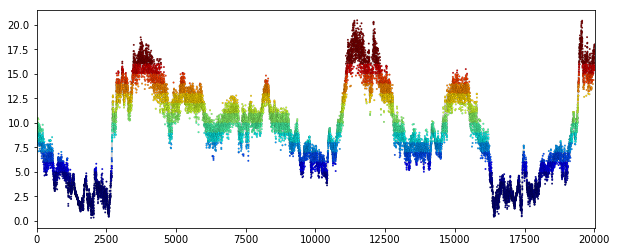

In [9]:
%matplotlib inline
font_time = fm.FontProperties(size = 4)
fig  = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(df1['indexMinutes'], df1['mean1'], 
           c=np.floor(df1['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax1.plot(df1['indexMinutes'], df1['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax1.set_xlim(df1['indexMinutes'].min(), df1['indexMinutes'].max())

**3.4.2. Plot Preparation One by One**  
  
3.4.2.1. Filter by `Wind Direction`

In [10]:
df2 = df1.loc[df1['dir'] == 1]

In [11]:
print(df2.shape)
df2.head()

(11147, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
0,1,18,0,0,1,0,10.355214,9.092462,0
1,1,18,0,1,1,0,9.321984,9.098566,1
2,1,18,0,2,1,0,9.699292,9.210747,2
3,1,18,0,3,1,0,8.507020,9.232127,3
4,1,18,0,4,1,0,9.689152,9.329701,4


* Missing data by `Wind Direction`

In [12]:
df2_miss = df1.loc[df1['dir'] == 0]
print(df2_miss.shape)
df2_miss.head(10)

(8854, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
822,1,18,13,42,0,0,5.200186,5.522727,822
823,1,18,13,43,0,0,6.000861,5.568884,823
824,1,18,13,44,0,0,5.941006,5.485398,824
825,1,18,13,45,0,0,5.999678,5.522969,825
826,1,18,13,46,0,0,5.689354,5.499900,826
827,1,18,13,47,0,0,4.718054,5.488752,827
828,1,18,13,48,0,0,4.823738,5.612992,828
829,1,18,13,49,0,0,5.630866,5.659463,829
830,1,18,13,50,0,0,5.533847,5.626228,830
879,1,18,14,39,0,0,5.887802,6.172314,879


3.4.2.2. Filter by `Power Generation`

In [13]:
df3 = df1.loc[df1['pow'] == 1]
print(df3.shape)
df3.head()

(10420, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
1013,1,18,16,53,1,1,5.098772,5.171323,1013
1014,1,18,16,54,1,1,4.862361,5.101587,1014
1015,1,18,16,55,1,1,5.205256,5.140628,1015
1016,1,18,16,56,1,1,5.734953,5.118339,1016
1017,1,18,16,57,1,1,5.699771,5.051515,1017


* Missing data by `Power Generation`

In [14]:
df3_miss = df1.loc[df1['pow'] == 0]
print(df3_miss.shape)
df3_miss.head(10)

(9581, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
0,1,18,0,0,1,0,10.355214,9.092462,0
1,1,18,0,1,1,0,9.321984,9.098566,1
2,1,18,0,2,1,0,9.699292,9.210747,2
3,1,18,0,3,1,0,8.507020,9.232127,3
4,1,18,0,4,1,0,9.689152,9.329701,4
5,1,18,0,5,1,0,9.794867,9.326783,5
6,1,18,0,6,1,0,8.924304,9.329908,6
7,1,18,0,7,1,0,9.512228,9.292910,7
8,1,18,0,8,1,0,7.677831,9.188567,8
9,1,18,0,9,1,0,7.442725,9.314998,9


3.4.2.3. Filter by `Wind Speed`

In [15]:
df4 = df1.loc[df1['mean10'] < 16].loc[df1['mean10'] >= 3.5]
print(df4.shape)
df4.head()

(16209, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
0,1,18,0,0,1,0,10.355214,9.092462,0
1,1,18,0,1,1,0,9.321984,9.098566,1
2,1,18,0,2,1,0,9.699292,9.210747,2
3,1,18,0,3,1,0,8.507020,9.232127,3
4,1,18,0,4,1,0,9.689152,9.329701,4


* Missing data by `Wind Speed`

In [16]:
df4_miss1 = df1.loc[df1['mean10'] < 3.5]
df4_miss2 = df1.loc[df1['mean10'] >= 16]
df4_miss = pd.concat([df4_miss1, df4_miss2])
print(df4_miss.shape)
df4_miss.head(10)

(3792, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
1123,1,18,18,43,0,0,3.320098,3.484611,1123
1124,1,18,18,44,0,0,3.840377,3.461828,1124
1125,1,18,18,45,0,0,4.197129,3.322789,1125
1126,1,18,18,46,0,0,3.844018,3.162602,1126
1127,1,18,18,47,0,0,3.244971,2.950882,1127
1128,1,18,18,48,0,0,3.624645,2.777635,1128
1129,1,18,18,49,0,0,3.563991,2.697473,1129
1130,1,18,18,50,0,0,3.376420,2.669073,1130
1131,1,18,18,51,0,0,2.915658,2.737356,1131
1132,1,18,18,52,0,0,2.918808,2.971647,1132


3.4.2.4. Filter by `Wind Direction, Power and Speed`

In [17]:
df5 = df4.loc[df1['pow'] * df1['dir']== 1]
print(df5.shape)
df5.head()

(5213, 9)


,month,day,hour,minute,dir,pow,mean1,mean10,indexMinutes
1013,1,18,16,53,1,1,5.098772,5.171323,1013
1014,1,18,16,54,1,1,4.862361,5.101587,1014
1015,1,18,16,55,1,1,5.205256,5.140628,1015
1016,1,18,16,56,1,1,5.734953,5.118339,1016
1017,1,18,16,57,1,1,5.699771,5.051515,1017


**3.4.2. Plot One by One**  

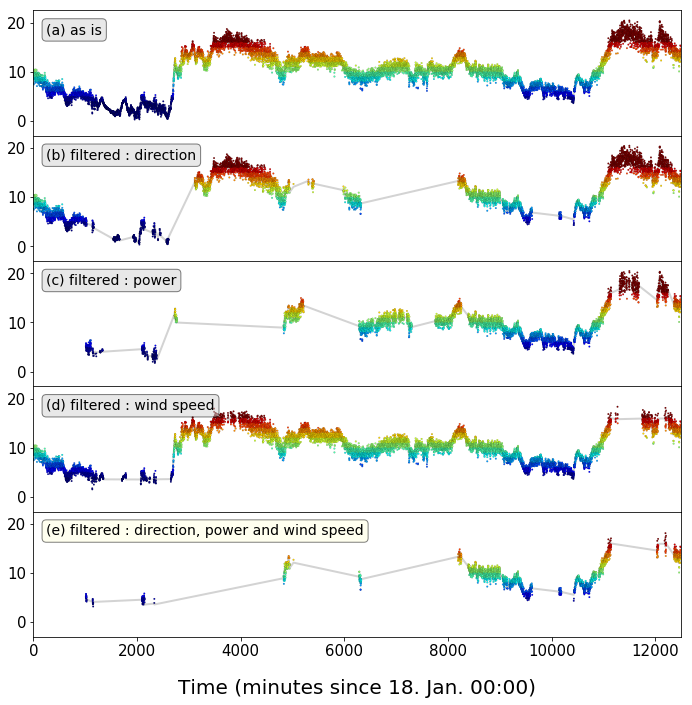

In [18]:
%matplotlib inline

fig  = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(5,1,1)

ax1.scatter(df1['indexMinutes'], df1['mean1'], 
           c=np.floor(df1['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax1.plot(df1['indexMinutes'], df1['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax1.set_xlim(df1['indexMinutes'].min(), 12500)
ax1.set_ylim(-3, df1['mean1'].max()*1.1)
ax1.set_xticks([])


ax2 =fig.add_subplot(5,1,2)

ax2.scatter(df2['indexMinutes'], df2['mean1'], 
           c=np.floor(df2['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
#ax2.bar(df2_miss['indexMinutes'], [10]*df2_miss.shape[0], width=0.01, color='red', linewidth=None, zorder=0, alpha=0.1)
ax2.plot(df2['indexMinutes'], df2['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax2.set_xlim(df1['indexMinutes'].min(), 12500)
ax2.set_ylim(-3, df1['mean1'].max()*1.1)
ax2.set_xticks([])

ax3 =fig.add_subplot(5,1,3)

ax3.scatter(df3['indexMinutes'], df3['mean1'], 
           c=np.floor(df3['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax3.plot(df3['indexMinutes'], df3['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax3.set_xlim(df1['indexMinutes'].min(), 12500)
ax3.set_ylim(-3, df1['mean1'].max()*1.1)
ax3.set_xticks([])

ax4 =fig.add_subplot(5,1,4)

ax4.scatter(df4['indexMinutes'], df4['mean1'], 
           c=np.floor(df4['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax4.plot(df4['indexMinutes'], df4['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax4.set_xlim(df1['indexMinutes'].min(), 12500)
ax4.set_ylim(-3, df1['mean1'].max()*1.1)
ax4.set_xticks([])

ax5 =fig.add_subplot(5,1,5)

ax5.scatter(df5['indexMinutes'], df5['mean1'], 
           c=np.floor(df5['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
ax5.plot(df5['indexMinutes'], df5['mean10'], linewidth=2, color='lightgrey',zorder=0)
ax5.set_xlim(df1['indexMinutes'].min(), 12500)
ax5.set_ylim(-3, df1['mean1'].max()*1.1)

boxprops = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
boxprops_e = dict(boxstyle='round', facecolor='lightyellow', alpha=0.5)
ax1.text(0.02, 0.9, '(a) as is', transform=ax1.transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
ax2.text(0.02, 0.9, '(b) filtered : direction', transform=ax2.transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
ax3.text(0.02, 0.9, '(c) filtered : power', transform=ax3.transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
ax4.text(0.02, 0.9, '(d) filtered : wind speed', transform=ax4.transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
ax5.text(0.02, 0.9, '(e) filtered : direction, power and wind speed', transform=ax5.transAxes, fontsize=14, verticalalignment='top', bbox=boxprops_e)

ax1.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)
ax4.tick_params(axis='y', labelsize=15)
ax5.tick_params(axis='y', labelsize=15)
ax5.tick_params(axis='x', labelsize=15)
ax5.set_xlabel('Time (minutes since 18. Jan. 00:00)', labelpad = 20, fontsize=20)

plt.subplots_adjust(hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
# plt.tight_layout()
plt.savefig('wind.png', dpi=200)
plt.show()

**3.4.3. Plot All at Once**  
* Equivalent to 3.4.2

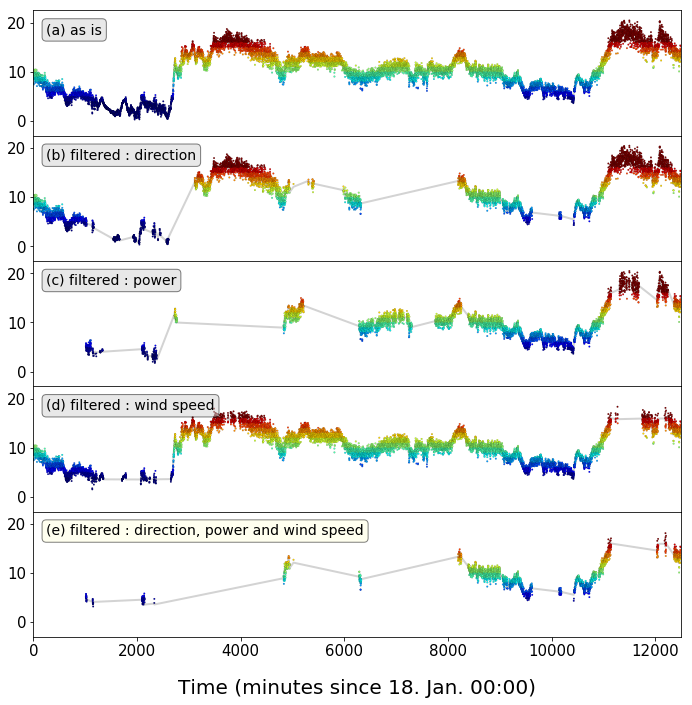

In [19]:
%matplotlib inline

fig, axes = plt.subplots(figsize=(10, 10), nrows=5, ncols=1, sharex=True)

axes[0].scatter(df1['indexMinutes'], df1['mean1'], 
           c=np.floor(df1['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
axes[0].plot(df1['indexMinutes'], df1['mean10'], linewidth=2, color='lightgrey',zorder=0)
axes[0].set_xlim(df1['indexMinutes'].min(), 12500)
axes[0].set_ylim(-3, df1['mean1'].max()*1.1)


axes[1].scatter(df2['indexMinutes'], df2['mean1'], 
           c=np.floor(df2['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
axes[1].plot(df2['indexMinutes'], df2['mean10'], linewidth=2, color='lightgrey',zorder=0)
axes[1].set_ylim(-3, df1['mean1'].max()*1.1)

axes[2].scatter(df3['indexMinutes'], df3['mean1'], 
           c=np.floor(df3['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
axes[2].plot(df3['indexMinutes'], df3['mean10'], linewidth=2, color='lightgrey',zorder=0)
axes[2].set_ylim(-3, df1['mean1'].max()*1.1)

axes[3].scatter(df4['indexMinutes'], df4['mean1'], 
           c=np.floor(df4['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
axes[3].plot(df4['indexMinutes'], df4['mean10'], linewidth=2, color='lightgrey',zorder=0)
axes[3].set_ylim(-3, df1['mean1'].max()*1.1)

axes[4].scatter(df5['indexMinutes'], df5['mean1'], 
           c=np.floor(df5['mean1']), 
           cmap='jet',
           linewidth=0.1, s=3, edgecolor='k',
           vmin=vCutIn, vmax=vMax, 
           zorder=1)
axes[4].plot(df5['indexMinutes'], df5['mean10'], linewidth=2, color='lightgrey',zorder=0)
axes[4].set_ylim(-3, df1['mean1'].max()*1.1)

boxprops = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
boxprops_e = dict(boxstyle='round', facecolor='lightyellow', alpha=0.5)
axes[0].text(0.02, 0.9, '(a) as is', transform=axes[0].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
axes[1].text(0.02, 0.9, '(b) filtered : direction', transform=axes[1].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
axes[2].text(0.02, 0.9, '(c) filtered : power', transform=axes[2].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
axes[3].text(0.02, 0.9, '(d) filtered : wind speed', transform=axes[3].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops)
axes[4].text(0.02, 0.9, '(e) filtered : direction, power and wind speed', transform=axes[4].transAxes, fontsize=14, verticalalignment='top', bbox=boxprops_e)

axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)
axes[3].tick_params(axis='y', labelsize=15)
axes[4].tick_params(axis='y', labelsize=15)
axes[4].tick_params(axis='x', labelsize=15)
axes[4].set_xlabel('Time (minutes since 18. Jan. 00:00)', labelpad = 20, fontsize=20)

plt.subplots_adjust(hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.savefig('winds.png', dpi=200)
plt.show()

#### **3.5. Analysis : Data Loss by Filtering**

In [20]:
no1 = data.index.size
print('(a) # of all data= {}'.format(no1))

data2 = data.loc[data['dir'] == 1]
no2 = data2.index.size
print('(b) # of dir filtered = {}'.format(no2))

data3 = data.loc[data['pow'] == 1]
no3 = data3.index.size
print('(c) # of pow filtered = {}'.format(no3))

data4 = data.loc[data['mean10'] < 16].loc[data['mean10'] >= 3.5]
no4 = data4.index.size
print('(d) # of wind speed filtered = {}'.format(no4))

data5 = data4.loc[data['dir'] * data['pow'] == 1]
no5 = data5.index.size
print('(e) # of direction, power and wind speed filtered = {}'.format(no5))

(a) # of all data= 46021
(b) # of dir filtered = 27116
(c) # of pow filtered = 24619
(d) # of wind speed filtered = 36568
(e) # of direction, power and wind speed filtered = 14739


**3.5.2. Plot Bar Graph with Proportions**

[-0.4, 0.6, 1.6, 2.6, 3.6]
[0.8, 0.8, 0.8, 0.8, 0.8]


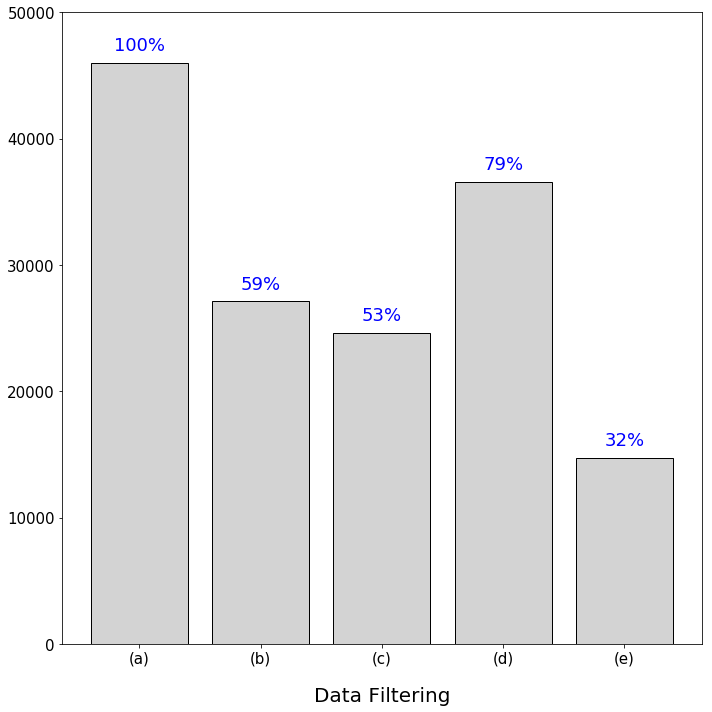

In [21]:
X = ['(a)', '(b)', '(c)', '(d)', '(e)']
Y = [no1, no2, no3, no4, no5]
Yp = np.array(Y)/no1 * 100

fig, ax = plt.subplots(figsize=(10, 10))
f = ax.bar(X, Y, color='lightgrey', edgecolor='black')

pos = [h.get_x() for h in f.patches]
ws = [h.get_width() for h in f.patches]

print(pos)
print(ws)

for i in range(len(Yp)):
  ax.text(pos[i]+ws[i]/2, Y[i]+1000, '{:>.0f}%'.format(Yp[i]), fontsize=18, color='blue', ha='center')
  
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(0, 50000)
ax.set_xlabel('Data Filtering', labelpad = 20, fontsize=20)

plt.tight_layout()
plt.savefig('num_data.png', dpi=200)